# 1.3. Getting started with Tensorflow 2.0

## Imports

In [19]:
import numpy as np # conda install numpy
import tensorflow as tf 
import matplotlib.pyplot as plt # conda install matplotlib

print(tf.__version__)

2.0.0


## Generate toy data

In [20]:
np.random.seed(42) 
tf.random.set_seed(42) 

In [21]:
# random linear data: 100 between 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# Adding noise to the random linear data 
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## Show the data

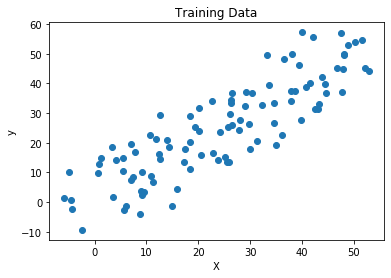

In [22]:
# Plot of Training Data 
plt.scatter(X, y) 
plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Training Data') 
plt.show() 

## LinearModel class

In [ ]:
class LinearModel:
    def __init__(self):
        # y_pred = W*X + b
        self.W = tf.Variable(13.0)
        self.b = tf.Variable(4.0)
    
    def loss(self, y, y_pred):
        return tf.reduce_mean(tf.square(y - y_pred))
    
    def train(self, X, y, lr=0.0001, epochs=20, verbose=True):
        def train_step():
            with tf.GradientTape() as t:
                current_loss = self.loss(y, self.predict(X))

            dW, db = t.gradient(current_loss, [self.W, self.b])
            self.W.assign_sub(lr * dW) # W -= lr * dW
            self.b.assign_sub(lr * db)
            
            return current_loss
        
        for epoch in range(epochs):
            current_loss = train_step()
            if verbose:
                print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') # <3 eager execution
                
    def predict(self, X):
        return self.W * X + self.b

## Using the model

Epoch 0: Loss: 124765.109375
Epoch 1: Loss: 86082.9765625
Epoch 2: Loss: 59400.33984375
Epoch 3: Loss: 40994.84765625
Epoch 4: Loss: 28298.88671875
Epoch 5: Loss: 19541.3046875
Epoch 6: Loss: 13500.388671875
Epoch 7: Loss: 9333.412109375
Epoch 8: Loss: 6459.06103515625
Epoch 9: Loss: 4476.35546875
Epoch 10: Loss: 3108.701171875
Epoch 11: Loss: 2165.30322265625
Epoch 12: Loss: 1514.5535888671875
Epoch 13: Loss: 1065.671875
Epoch 14: Loss: 756.03662109375
Epoch 15: Loss: 542.452392578125
Epoch 16: Loss: 395.1237487792969
Epoch 17: Loss: 293.4975280761719
Epoch 18: Loss: 223.3964080810547
Epoch 19: Loss: 175.04122924804688
Epoch 20: Loss: 141.6861572265625
Epoch 21: Loss: 118.67814636230469
Epoch 22: Loss: 102.80734252929688
Epoch 23: Loss: 91.85980224609375
Epoch 24: Loss: 84.3082504272461
Epoch 25: Loss: 79.0992660522461
Epoch 26: Loss: 75.50613403320312
Epoch 27: Loss: 73.02761840820312
Epoch 28: Loss: 71.31796264648438
Epoch 29: Loss: 70.13866424560547
Epoch 30: Loss: 69.3251647949218

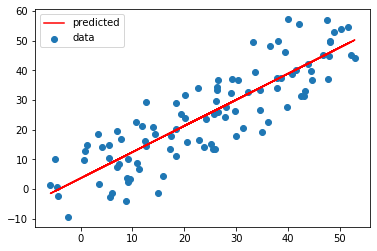

In [24]:
model = LinearModel()
model.train(X, y, epochs=40)
plt.scatter(X, y, label='data')
plt.plot(X, model.predict(X), 'r-', label='predicted')
plt.legend()